In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
# import cdd
import math
import cvxpy as cvx
# from collections import deque
import random
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

# Modulus of families of maximal increasing subsequences of permutations

### Information
Student: Nalen Rangarajan

Graduate Mentor: Ngoc Huy Truong\
Faculty Mentor: Pietro Poggi-Corradini

under NODE Group activities

### Items Read
Mathematics of Networks: Modulus Theory and Convex Optimization, Nathan Albin and Pietro Poggi-Corradini

Finding a Minimum Independent Dominating Set in a Permutation Graph, Mikhail J. Atallah et al.

Maintenance of Configurations in the plane, Mark H. Overmars and Jan van Leeuwen

Combinatorics and Random Matrix Theory, Jinho Baik

### Permutations

An ordering of elements

Consider a permutation of the elements $1,\dots,8$

$$
\pi = 2\ 7\ 1\ 6\ 4\ 3\ 5\ 8\
$$

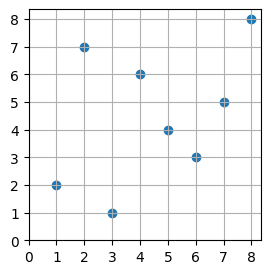

In [3]:
pi =  [2, 7, 1, 6, 4, 3, 5, 8]
x = range(1,9)

# initialize figure
fig, fig = plt.subplots(figsize=(3, 3))
    
plt.scatter(x,pi)

# Set the ticks to be at the edges of the bins.
fig.set_xticks(range(0,9))
fig.set_yticks(range(0,9))
plt.grid(True)

<table>
<tr>
<td>
<img src="images/NalenDRPImages/Permutation8.png" width="400">
</td>
</tr>
</table>

### Maximal Increasing Subsequences (MISS)

A subsequence of elements in a permutation that cannot be extended

Given our permutation $2\ 7\ 1\ 6\ 4\ 3\ 5\ 8\,$

$2\ 4\ 5\ 8\ $ is a maximal increasing subsequence 

that corresponds to the indices $1\ 5\ 7\ 8\ $

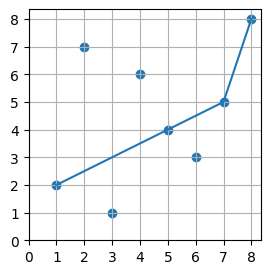

In [4]:
#small helper image
pi =  [2, 7, 1, 6, 4, 3, 5, 8]
x = range(1,9)

max = [2, 4, 5, 8]
maxI = [1, 5, 7, 8]

# initialize figure
fig, fig = plt.subplots(figsize=(3, 3))
    
plt.scatter(x,pi)
#plt.plot(badI,bad)
plt.plot(maxI,max)

# Set the ticks to be at the edges of the bins.
fig.set_xticks(range(0,9))
fig.set_yticks(range(0,9))
plt.grid(True)

<table>
<tr>
<td>
<img src="images/NalenDRPImages/Permutation8MISS.png" width="400">
</td>
</tr>
</table>

### Families

$\Gamma$ represents a family of objects $\gamma$

We then define $\mathcal{N}$ to be the usage matrix of objects in $\Gamma$

With the previous MISS the row entry in $\mathcal{N}$ would 

be $\begin{bmatrix} 1 & 0 & 0 & 0 & 1 & 0 & 1 & 1 \end{bmatrix}$

### Weightings

We define our node density $\rho \in \mathbb{R}_{+}^{N}$ and the $\rho$-length as $\ell_\rho(\gamma) := \sum_{v = 1}^{N} \mathcal{N}(\gamma, v)\rho(v)$ (the "cost" of a MISS)

And admissibility as $\rho$ is admissible for $\Gamma$ if $\ell_{\rho}(\gamma) \geq 1 \: \: \:\forall \gamma \in \Gamma$

We then define the p-Modulus as $\text{Mod}_p(\Gamma) := \inf\limits_{\rho \in \text{Adm}(\Gamma)}\sum_{v=1}^{\text{N}}\rho(v)^p$

For example:

We see that the 1-Modulus is defined as $\text{Mod}_1(\Gamma) := \inf\limits_{\rho \in \text{Adm}(\Gamma)}\sum_{v=1}^{\text{N}}\rho(v)$

And the 2-Modulus is defined as $\text{Mod}_2(\Gamma) := \inf\limits_{\rho \in \text{Adm}(\Gamma)}\sum_{v=1}^{\text{N}}\rho(v)^2$

### Two algorithms for computing Modulus:
+ Basic Algorithm
+ Plus-1 Algorithm

<table>
<tr>
<td>
<img src="images/basic.png" width="400">
</td>
<td>
<img src="images/new_plusone.png" width="400">
</td>
</tr>
</table>

The Basic Algorithm results in a convex optimization problem

While the Plus-1 Algorithm results in a probabilistic approach

### The Problem

The shortest_path() function is slow

Goal: Find a more efficient algorithm for computing the shortest_path

### Our Implementation

From here we now turn to the process of implementing an algorithm to find a minimum weight MISS from Atallah et al

We first begin with implementing the work done by Mark H. Overmars and Jan van Leeuwen

### Structure

This algorithm for finding a minimum weight MISS results in the maintenance of a tree structure where each node maintains a list of nodes below it

For example:

Using our earlier permutation $ \pi = 2\ 7\ 1\ 6\ 4\ 3\ 5\ 8\ $

We get this tree:

<table>
<tr>
<td>
<img src="images/NalenDRPImages/AVLPerm8.png" width="650">
</td>
</tr>
</table>

This structure lends itself to a representation of MISS

From this structure we get the following MISS:
$$
    [ 1\ 2\ 8\ ]
$$
$$
    [ 1\ 4\ 8\ ]
$$
$$
    [ 3\ 4\ 8\ ]
$$
$$
    [ 1\ 5\ 7\ 8\ ]
$$
$$
    [ 3\ 5\ 7\ 8\ ]
$$
$$
    [ 1\ 3\ 6\ 8\ ]
$$
$$
    [ 3\ 6\ 7\ 8\ ]
$$

### Walkthrough of Implementation

Additionally, this implementation also allows for concatenation of permutations

Let's call the earlier permutation $\pi_1$ and we will denote $ \pi_2 = 12\ 9\ 10\ 11\ $



We first create two trees called tree_1 and tree_2 representing the two permutations $ \pi_1 $ and $ \pi_2 $

<table>
<tr>
<td>
<img src="images/NalenDRPImages/AVLPerm8.png" width="700">
</td>
<td>
<img src="images/NalenDRPImages/AVLPerm4.png" width="700">
</td>
</tr>
</table>

### Down
The first step in the concatenation of these two permutations is a process called Down

This function allows us to traverse through a tree in search for a specific node, or in our case the right-most node

<table>
<tr>
<td>
<img src="images/NalenDRPImages/Down.png" width="600">
</td>
</tr>
</table>

### Up

The next step upon finding this node is to insert tree_2 as a child of this right-most node in tree_1

From here we use the Up function to drag tree_2 up into tree_1

<table>
<tr>
<td>
<img src="images/NalenDRPImages/Up.png" width="500">
</td>
</tr>
</table>

<table>
<tr>
<td>
<img src="images/NalenDRPImages/BeginningUp.png" width="350">
</td>
</tr>
</table>

### Drag Up The Tree

<table>
<tr>
<td>
<img src="images/NalenDRPImages/Step2Up.png" width="350">
</td>
</tr>
</table>

<table>
<tr>
<td>
<img src="images/NalenDRPImages/Step3Up.png" width="350">
</td>
</tr>
</table>

<table>
<tr>
<td>
<img src="images/NalenDRPImages/Step4Up.png" width="350">
</td>
</tr>
</table>

<table>
<tr>
<td>
<img src="images/NalenDRPImages/Step5Up.png" width="350">
</td>
</tr>
</table>

### Finishing Touches

Lastly we ensure that our tree is balanced and from there we have completed the concatenation of $ \pi_1 $ and $ \pi_2 $

<table>
<tr>
<td>
<img src="images/NalenDRPImages/FinalTree.png" width="350">
</td>
</tr>
</table>

### Concatenate

This entire process is encompassed in the following pseudocode

<table>
<tr>
<td>
<img src="images/NalenDRPImages/Concatenate.png" width="350">
</td>
</tr>
</table>

### Resulting MISS

$$
    [ 1\ 2\ 8\ 9\ ]
$$
$$
    [ 1\ 4\ 8\ 9\ ]
$$
$$
    [ 3\ 4\ 8\ 9\ ]
$$
$$
    [ 1\ 5\ 7\ 8\ 9\ ]
$$
$$
    [ 3\ 5\ 7\ 8\ 9\ ]
$$
$$
    [ 1\ 6\ 7\ 8\ 9\ ]
$$
$$
    [ 3\ 6\ 7\ 8\ 9\ ]
$$
$$
    [ 1\ 2\ 8\ 10\ 11\ 12\ ]
$$
$$
    [ 1\ 4\ 8\ 10\ 11\ 12\ ]
$$
$$
    [ 3\ 4\ 8\ 10\ 11\ 12\ ]
$$
$$
    [ 1\ 5\ 7\ 8\ 10\ 11\ 12\ ]
$$
$$
    [ 3\ 5\ 7\ 8\ 10\ 11\ 12\ ]
$$
$$
    [ 1\ 6\ 7\ 8\ 10\ 11\ 12\ ]
$$
$$
    [ 3\ 6\ 7\ 8\ 10\ 11\ 12\ ]
$$

### Future Work

+ Finish implementation of splitting a tree along a vertical axis
+ Use the Split function to finish the MinMax function, which is intended to replace the current shortest_path() function